# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable
titanic.select_dtypes(include=['float64', 'int'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [6]:
#your code here- categorical variable
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [9]:
# your code here
plt.style.use('classic')
print(plt.style.available)
plt.figure(figsize=(12, 6))


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b35a210>]],
      dtype=object)

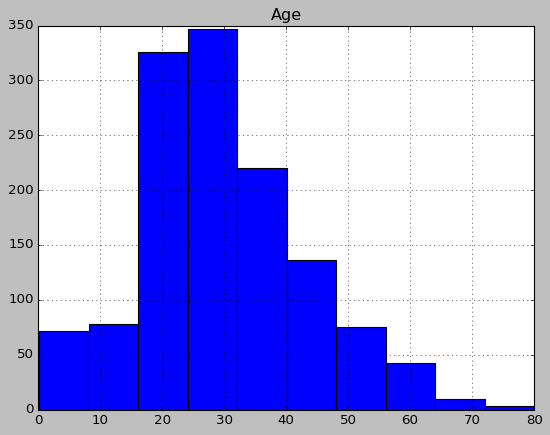

In [10]:
# your code here
titanic.hist(column=["Age"])

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

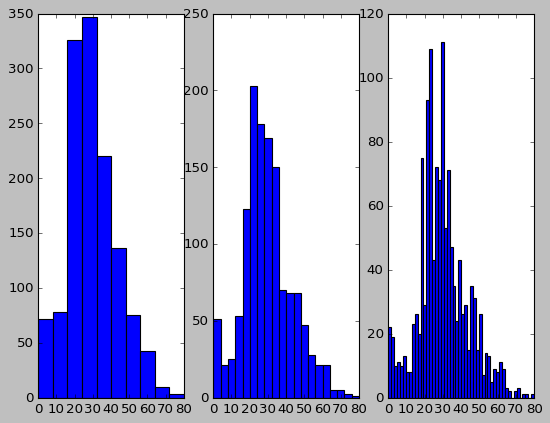

In [14]:
# your code here
fig, axs = plt.subplots(1, 3)
axs[0].hist(titanic['Age'], bins=10)
axs[1].hist(titanic['Age'], bins=20)
axs[2].hist(titanic['Age'], bins=50)


#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
#Si, por el número de columnas.

#### Use seaborn to show the distribution of the column `Age`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e2e1b10>]],
      dtype=object)

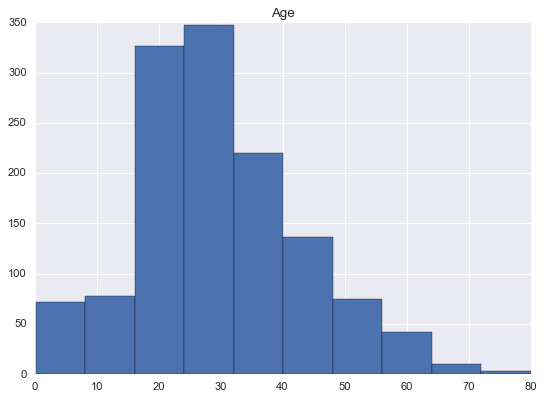

In [15]:
# your code here
plt.style.use('seaborn')
titanic.hist(column=["Age"])


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

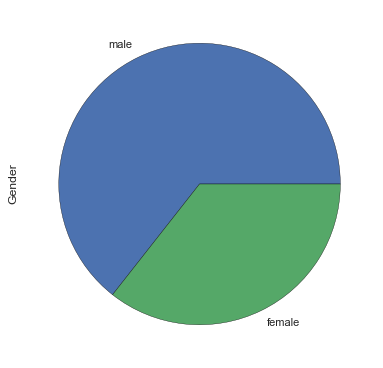

In [37]:
# your code here- 1st way
t1 = titanic["Gender"].value_counts()
t1.plot.pie()

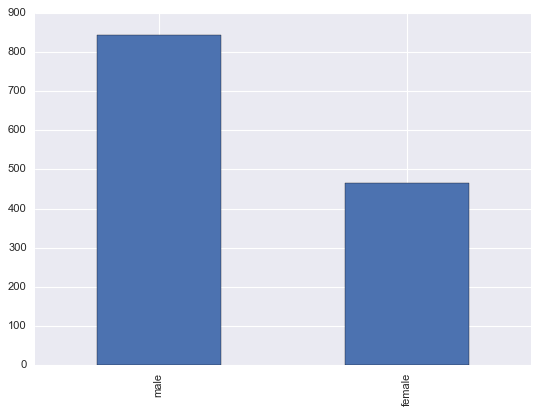

In [38]:
# your code here- 2nd way
t1.plot.bar()

#### Use the appropriate plot to visualize the column `Pclass` 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12108c210>]],
      dtype=object)

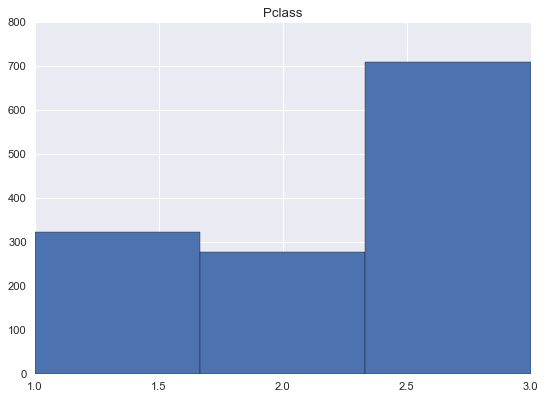

In [47]:
# your code here
titanic.hist(column='Pclass', bins=3)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

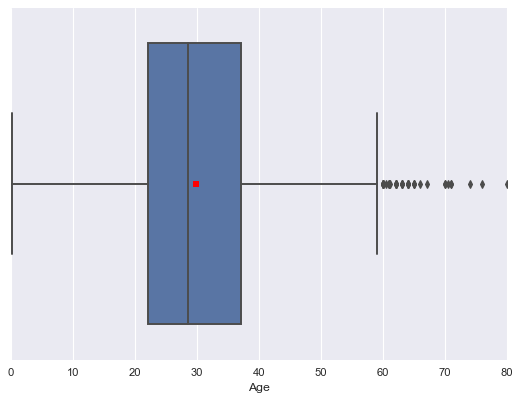

In [55]:
# your code here
sns.boxplot(titanic['Age'], showmeans=True)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
#El 50% de las edades estan entre 22 y 37 años, a partir de 58 están fuera de rango

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

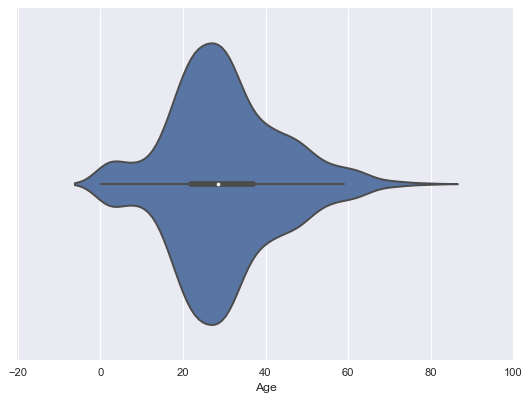

In [56]:
#your code here
sns.violinplot(titanic['Age'], showmeans=True)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
#La mayoria de las edades estan entre 18-35 años, la moda es entorno a los 22 y la media los 25.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


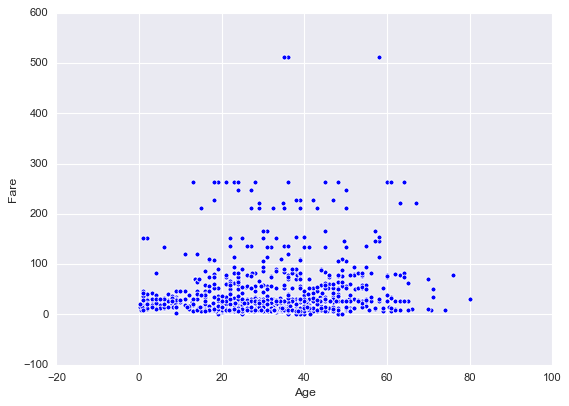

In [66]:
#your code-1st way
sns.scatterplot(titanic['Age'], titanic['Fare'])

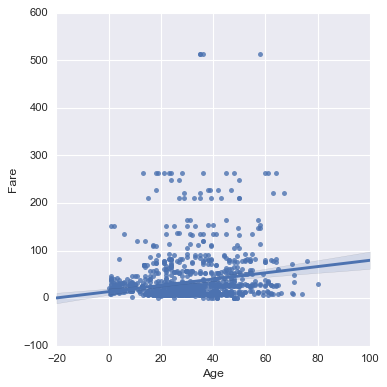

In [73]:
# your code-2nd way
sns.lmplot(x='Age', y='Fare', data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

(7, 0)

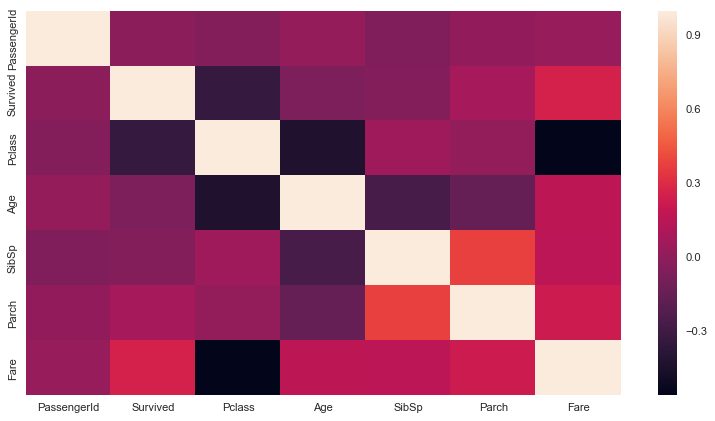

In [84]:
#your code here
hm = sns.heatmap(titanic.corr())
hm.set_ylim(7,0,0)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#Parch y SibSp son los que más relacionados están.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [85]:
t1

male      843
female    466
Name: Gender, dtype: int64

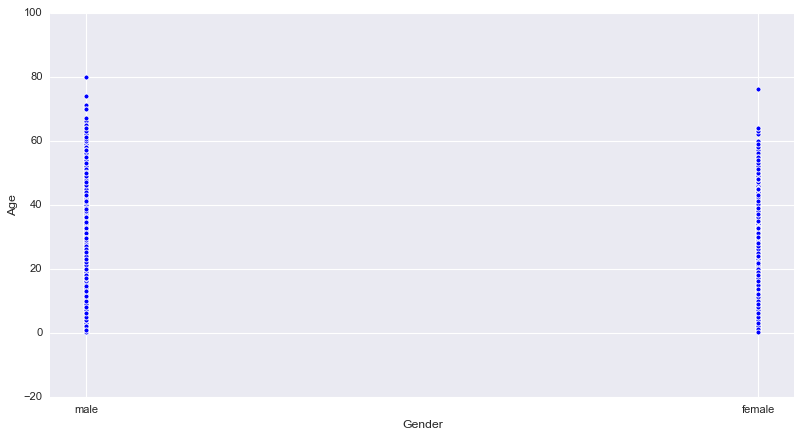

In [91]:
sns.scatterplot(titanic['Gender'], titanic['Age'])